In [64]:
library("ggplot2")
library("reshape2")

ped_deaths <- read.csv("./FluViewPhase2Data/Weekly_pediatric_deaths.csv", skip = 1)

In [65]:
ped_deaths <- ped_deaths[, c("WEEK.NUMBER", "PREVIOUS.WEEK.DEATHS", "CURRENT.WEEK.DEATHS")]

In [66]:
week_factor = gsub("-", '', ped_deaths$WEEK.NUMBER )

# ped_deaths$WEEK.NUMBER <- factor(ped_deaths$WEEK.NUMBER, levels=week_factor)

# ped_deaths$WEEK.NUMBER

ped_deaths <- melt(ped_deaths, id="WEEK.NUMBER")
ped_deaths

WEEK.NUMBER,variable,value
2015-40,PREVIOUS.WEEK.DEATHS,0
2015-41,PREVIOUS.WEEK.DEATHS,0
2015-42,PREVIOUS.WEEK.DEATHS,0
2015-43,PREVIOUS.WEEK.DEATHS,0
2015-44,PREVIOUS.WEEK.DEATHS,2
2015-45,PREVIOUS.WEEK.DEATHS,0
2015-46,PREVIOUS.WEEK.DEATHS,0
2015-47,PREVIOUS.WEEK.DEATHS,0
2015-48,PREVIOUS.WEEK.DEATHS,2
2015-49,PREVIOUS.WEEK.DEATHS,1


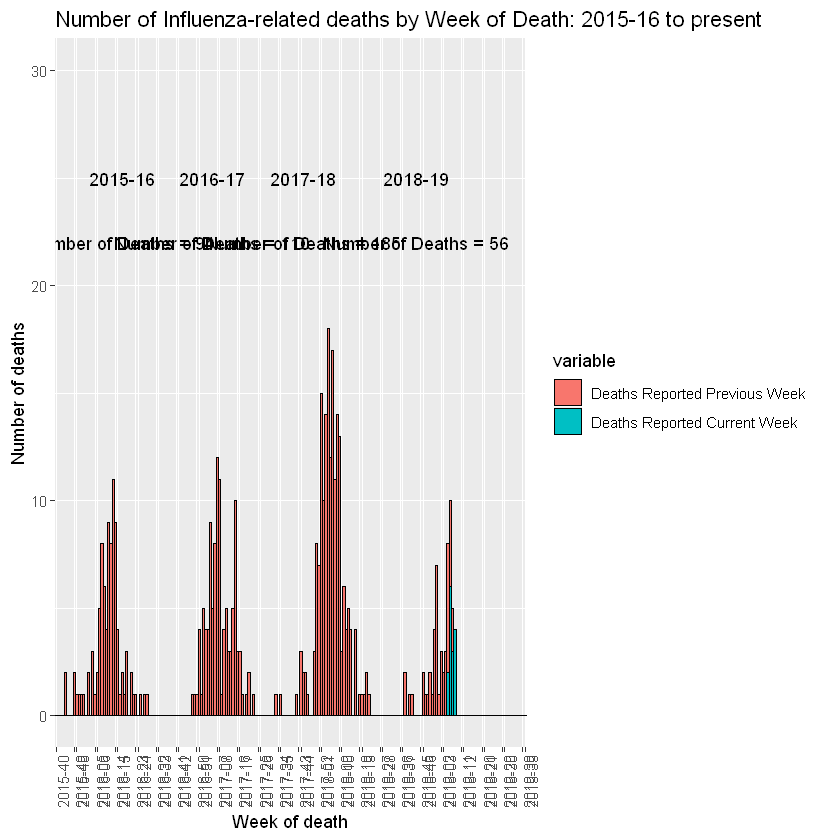

In [87]:
ggplot(
  data = ped_deaths, 
  aes(WEEK.NUMBER, value, fill =  variable)) +
  geom_bar(stat = "identity", width = 1, colour="black") +
  ylab("Number of deaths") +
  xlab("Week of death") +
  ggtitle("Number of Influenza-related deaths by Week of Death: 2015-16 to present") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_discrete(breaks=ped_deaths$WEEK.NUMBER[c(TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE)]) +
  scale_fill_discrete(labels = c("Deaths Reported Previous Week", "Deaths Reported Current Week")) +
  ylim(0, 30) +
  annotate("text", label = "2015-16", x = 30, y = 25, color = "black") +
  annotate("text", label = "Number of Deaths = 94", x = 30, y = 22, color = "black") +
  annotate("text", label = "2016-17", x = 70, y = 25, color = "black") +
  annotate("text", label = "Number of Deaths = 110", x = 70, y = 22, color = "black") +
  annotate("text", label = "2017-18", x = 110, y = 25, color = "black") +
  annotate("text", label = "Number of Deaths = 185", x = 110, y = 22, color = "black") +
  annotate("text", label = "2018-19", x = 160, y = 25, color = "black") +
  annotate("text", label = "Number of Deaths = 56", x = 160, y = 22, color = "black")
#theme(legend.title=element_blank())

In [68]:
ped_deaths$WEEK.NUMBER[c(TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE)]

[1] 2015-40 2015-49 2016-06 2016-15 2016-24 2016-33 2016-42 2016-51 2017-08
[10] 2017-17 2017-26 2017-35 2017-44 2018-01 2018-10 2018-19 2018-28 2018-37
[19] 2018-46 2019-03 2019-12 2019-21 2019-30 2019-39 2015-48 2016-05 2016-14
[28] 2016-23 2016-32 2016-41 2016-50 2017-07 2017-16 2017-25 2017-34 2017-43
[37] 2017-52 2018-09 2018-18 2018-27 2018-36 2018-45 2019-02 2019-11 2019-20
[46] 2019-29 2019-38
208 Levels: 2015-40 2015-41 2015-42 2015-43 2015-44 2015-45 2015-46 ... 2019-39